In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Activation
from keras import activations
from keras import backend as K
import keras

In [7]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
breast_cancer = fetch_ucirepo(id=17)

# data (as pandas dataframes)
x = breast_cancer.data.features
y = breast_cancer.data.targets
yn=[]
for i in y['Diagnosis']:
    if i == 'M':
        yn.append(1)
    else:
        yn.append(0)

In [8]:
#distribution of data
print(len(y[y['Diagnosis'] == 'M']), ' Malignant')
print(len(y[y['Diagnosis'] == 'B']), ' Benin')

212  Malignant
357  Benin


In [9]:
#seperate data
malignant_data=x[y['Diagnosis']=='M']
benin_data = x[y['Diagnosis']=='B']

In [10]:
#exploratory analysis
for i in breast_cancer.variables['name'][2:]:
    print(np.max(malignant_data[i]),i+'Max')
    print(np.min(malignant_data[i]),i+'Min')
    print(np.average(malignant_data[i]), i+'Avg')

28.11 radius1Max
10.95 radius1Min
17.462830188679245 radius1Avg
39.28 texture1Max
10.38 texture1Min
21.60490566037736 texture1Avg
188.5 perimeter1Max
71.9 perimeter1Min
115.36537735849056 perimeter1Avg
2501.0 area1Max
361.6 area1Min
978.3764150943397 area1Avg
0.1447 smoothness1Max
0.07371 smoothness1Min
0.10289849056603775 smoothness1Avg
0.3454 compactness1Max
0.04605 compactness1Min
0.14518778301886792 compactness1Avg
0.4268 concavity1Max
0.02398 concavity1Min
0.16077471698113208 concavity1Avg
0.2012 concave_points1Max
0.02031 concave_points1Min
0.08799 concave_points1Avg
0.304 symmetry1Max
0.1308 symmetry1Min
0.1929089622641509 symmetry1Avg
0.09744 fractal_dimension1Max
0.04996 fractal_dimension1Min
0.06268009433962264 fractal_dimension1Avg
2.873 radius2Max
0.1938 radius2Min
0.6090825471698113 radius2Avg
3.568 texture2Max
0.3621 texture2Min
1.2109146226415093 texture2Avg
21.98 perimeter2Max
1.334 perimeter2Min
4.3239292452830185 perimeter2Avg
542.2 area2Max
13.99 area2Min
72.67240566

In [11]:
#exploratory analysis
for i in breast_cancer.variables['name'][2:]:
    print(np.max(benin_data[i]),i+'Max')
    print(np.min(benin_data[i]),i+'Min')
    print(np.average(benin_data[i]),i+"Avg")

17.85 radius1Max
6.981 radius1Min
12.146523809523808 radius1Avg
33.81 texture1Max
9.71 texture1Min
17.914761904761903 texture1Avg
114.6 perimeter1Max
43.79 perimeter1Min
78.075406162465 perimeter1Avg
992.1 area1Max
143.5 area1Min
462.7901960784313 area1Avg
0.1634 smoothness1Max
0.05263 smoothness1Min
0.09247764705882354 smoothness1Avg
0.2239 compactness1Max
0.01938 compactness1Min
0.0800846218487395 compactness1Avg
0.4108 concavity1Max
0.0 concavity1Min
0.04605762100840336 concavity1Avg
0.08534 concave_points1Max
0.0 concave_points1Min
0.025717406162464984 concave_points1Avg
0.2743 symmetry1Max
0.106 symmetry1Min
0.1741859943977591 symmetry1Avg
0.09575 fractal_dimension1Max
0.05185 fractal_dimension1Min
0.0628673949579832 fractal_dimension1Avg
0.8811 radius2Max
0.1115 radius2Min
0.28408235294117645 radius2Avg
4.885 texture2Max
0.3602 texture2Min
1.2203801120448179 texture2Avg
5.118 perimeter2Max
0.757 perimeter2Min
2.0003212885154062 perimeter2Avg
77.11 area2Max
6.802 area2Min
21.13514

In [12]:
malignant_data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [13]:
benin_data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


Text(0.5, 1.0, 'Concavity1')

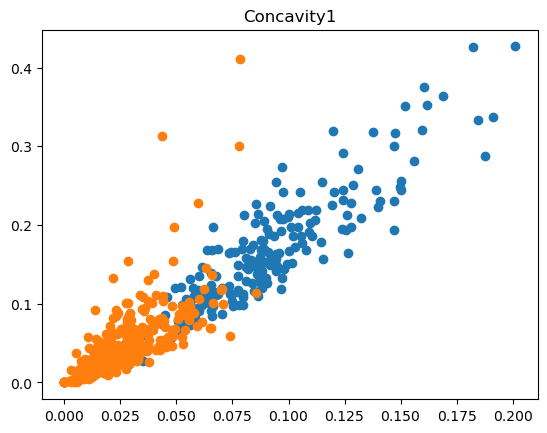

In [14]:
plt.scatter(malignant_data['concave_points1'],malignant_data['concavity1'])
plt.scatter(benin_data['concave_points1'],benin_data['concavity1'])
plt.title("Concavity1")


In [15]:
#split dataset
xtrain,xtest,ytrain,ytest = train_test_split(x[:],yn,test_size=0.2,stratify=yn)

In [16]:
def DecisionTree(ax):
    print('training decision tree')
    l = [i for i in range(1,21)]
    evalscore=[]
    for i in l:
        dt = DecisionTreeClassifier(max_depth=i)
        dt.fit(xtrain,ytrain)
        evalscore.append(dt.score(xtest, ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('Decision Tree Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [17]:
def KNN(ax):
    print('training KNN')
    l = [i for i in range(1,21)]
    evalscore=[]
    for i in l:
        kn = KNeighborsClassifier(n_neighbors=i)
        kn.fit(xtrain,ytrain)
        evalscore.append(kn.score(xtest, ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('n neigbhors')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('KNeighbors Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [18]:
def RandomForest(ax):
    print('training random forest')
    l = [i for i in range(1, 300,10)]
    evalscore = []
    for i in l:
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(xtrain,ytrain)
        evalscore.append(rf.score(xtest,ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('Random Forest Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [19]:
def AdaBoost(ax):
    print('training adaboost')
    l = [i for i in range(1, 300,10)]
    evalscore = []
    for i in l:
        ada = AdaBoostClassifier(n_estimators=i)
        ada.fit(xtrain,ytrain)
        evalscore.append(ada.score(xtest,ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('AdaBoost Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [20]:
def GradientBoosting(ax):
    print('training gradient boosting')
    l = [i for i in range(1, 300,10)]
    evalscore = []
    for i in l:
        gb = GradientBoostingClassifier(n_estimators=i)
        gb.fit(xtrain,ytrain)
        evalscore.append(gb.score(xtest,ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('Gradient Boosting Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [21]:
def ExtraTree(ax):
    print('training extra tree')
    l = [i for i in range(1, 300,10)]
    evalscore = []
    for i in l:
        xtc = ExtraTreesClassifier(n_estimators=i)
        xtc.fit(xtrain,ytrain)
        evalscore.append(xtc.score(xtest,ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('Extra Trees Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [22]:
def Bagging(ax):
    print('training bagging')
    l = [i for i in range(1, 300,10)]
    evalscore = []
    for i in l:
        bg = BaggingClassifier(n_estimators=i)
        bg.fit(xtrain,ytrain)
        evalscore.append(bg.score(xtest,ytest))
    ax.plot(l,evalscore)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('evaluation accuracy')
    ax.set_title('Bagging Classifier')
    idx=evalscore.index(max(evalscore))
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))

In [61]:
def DNN(ax):
    print('Training Deep Neural Network (2 Hidden Layers)')
    # L = list(range(1,31))
    L = list(range(1, 31, 1))
    evalscore = []

    # parameters
    batch_size = 8
    epochs     = 24

    # training data
    x_train = np.expand_dims(xtrain.values, -1)
    y_train = np.array(ytrain)
    x_test = np.expand_dims(xtest.values, -1)
    y_test = np.array(ytest)

    # conversion
    num_classes = 2

    #opt = keras.optimizers.Adamax()
    opt = "adam"

    for i in L:
        # data
        training_x = x_train[:,0:i].astype("float32")   # we want to use f
        training_y = keras.utils.to_categorical(y_train, num_classes=num_classes)

        test_x     = x_test[:,0:i].astype("float32")
        test_y     = keras.utils.to_categorical(y_test, num_classes=num_classes)

        # define the model
        mdl = keras.Sequential(
            layers=[
                keras.Input(shape=training_x[0,:].shape),
                layers.Flatten(),
                layers.UnitNormalization(),
                layers.Dense(16, activation=activations.swish),
                layers.Dropout(0.01),
                layers.UnitNormalization(),
                layers.Dense(num_classes, activation=activations.softmax)
            ]
        )
        # compile model
        mdl.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', 'categorical_crossentropy'], run_eagerly=False)

        # train
        mdl.fit(training_x, training_y, batch_size=batch_size, epochs=epochs)

        # evaluate 
        score=mdl.evaluate(test_x, test_y, verbose=0)

        # accuracy
        accuracy = score[1]

        evalscore.append(round(accuracy, 2))

    ax.plot(L,evalscore)
    ax.set_xlabel('Number of Features')
    ax.set_ylabel('Evaluation Accuracy')
    ax.set_title('Deep Neural Network Classifier')
    idx=evalscore.index(max(evalscore))
    print(f'Max score: {max(evalscore)}')
    ax.text(idx,max(evalscore),'max ({},{})'.format(idx,round(max(evalscore),2)))


Training Deep Neural Network (2 Hidden Layers)
Epoch 1/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.5817 - categorical_crossentropy: 0.6821 - loss: 0.6821 
Epoch 2/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.6256 - categorical_crossentropy: 0.6637 - loss: 0.6637
Epoch 3/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5996 - categorical_crossentropy: 0.6719 - loss: 0.6719
Epoch 4/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.6016 - categorical_crossentropy: 0.6775 - loss: 0.6775
Epoch 5/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.6370 - categorical_crossentropy: 0.6554 - loss: 0.6554
Epoch 6/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.6556 - categorical_crossentropy: 0.6467 - loss: 0.6467
Epoch 7/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.6680 - categorical_crossentropy: 0.6394 - loss: 0.6394
Epoch 8/24
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.6191 - categorical_crossentropy: 0.6661

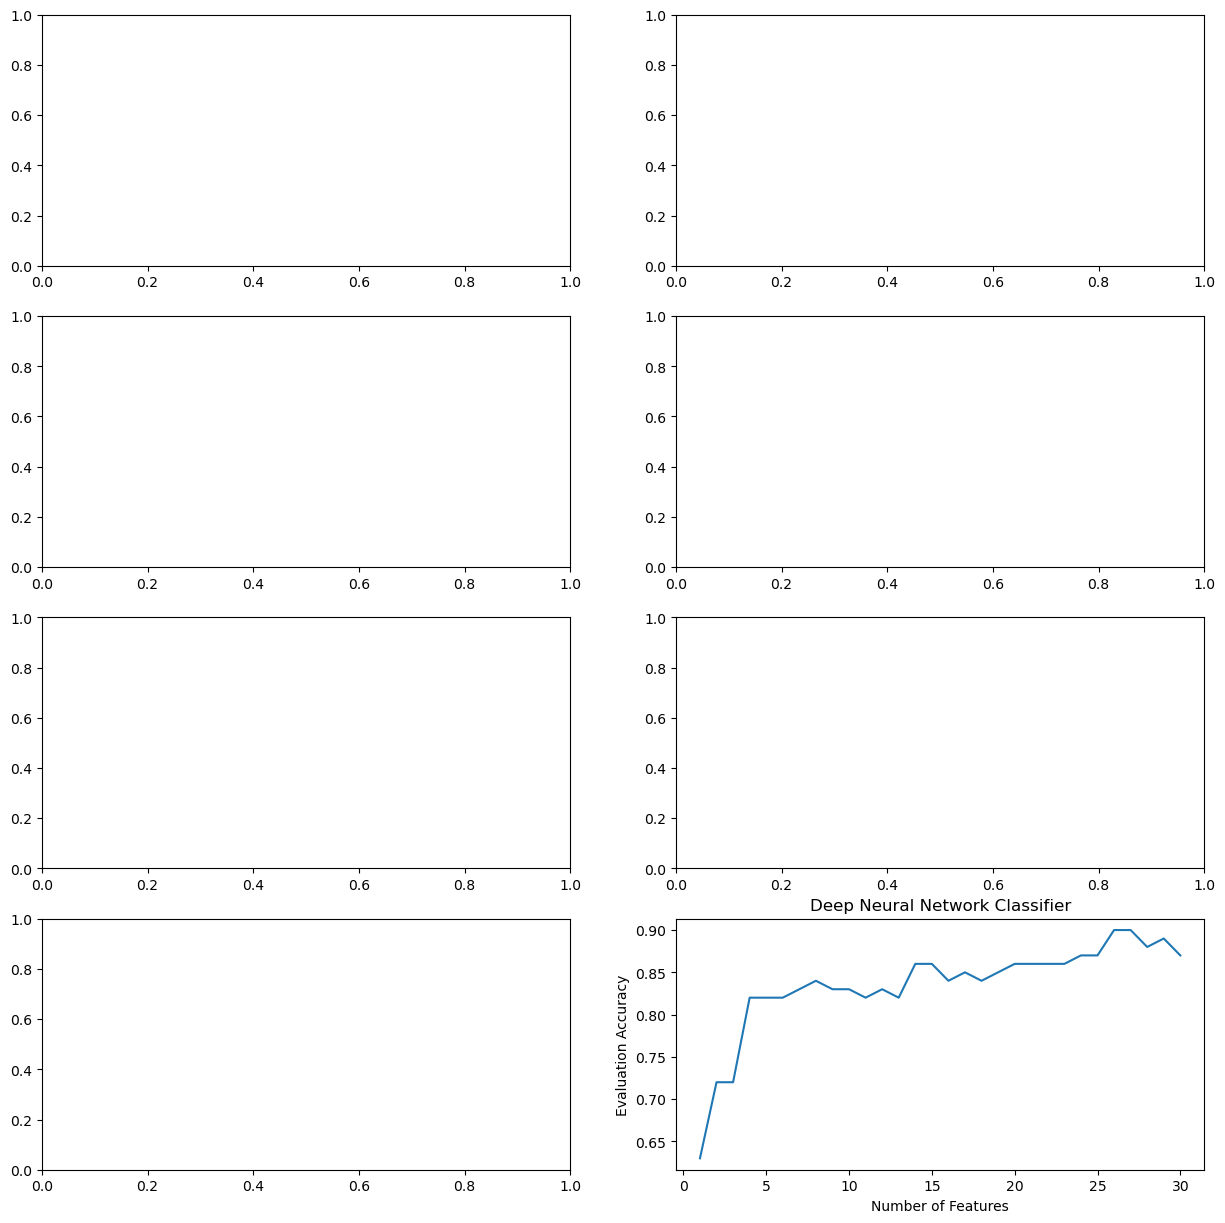

In [63]:
#call all models
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(15,15))
#DecisionTree(axes[0][0])
#KNN(axes[0][1])
#RandomForest(axes[1][0])
#AdaBoost(axes[1][1])
#GradientBoosting(axes[2][0])
#Bagging(axes[2][1])
#ExtraTree(axes[3][0])
DNN(axes[3][1])